# KMean

In [ ]:
"""
군집(Cluster)알고리즘을 활용한 K-평균

KMean
n_clusters : 클러스터 개수
init(리스트) :init에 군집 초기화를 할 위치(근사적인 위치를 안다는 가정하에)를
              전달하면 센트로이드를 적절한 위치에 초기화시킬 수 있다.
n_init = 1 : 랜덤 초기화를 실행할 횟수. 기본은 sklearn 1.4에서 'auto'

kmean.inertia_ : 각 샘플과 가장 가까운 센트로이드와의 거리의 제곱 거리 합
                 기본적으로 작을수록 좋으며, 센트로이드가 늘어날수록 줄어든다.
                 센트로이드 개수가 늘어날수록 급격하게 이니셔가 줄어들다가
                 감소폭이 크게 꺾이는 지점을 'elbow'라고 하며.
                 적절한 센트로이드의 개수를 모른다면 이 elbow 지점이 시작하기에
                 나쁘지 않은 지침이다.
                 (정확한 k개는 실루엣 점수와 실루엣 다이어그램으로 확인 가능)
 # from sklearn.metrics import silhouette_score
 # silhouette_score(X, kmeans.labels_)

kmeans.cluster_centers_ : 각 클러스터의 좌표가 들어있다.

# Note
1. KMean을 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요하다
2. KMean은 장점도 많지만 한계도 명확하다(데이터가 타원형으로 밀집되어 있으면
   분류 성능이 나쁘다.)

MiniBatchKmeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

1. 일반 Kmean과 거의 비슷한 성능(비슷한 이니셔)를 내면서 클러스터를 구분하는
시간은 약 3배정도 단축된다. 그러나 클러스터를 만드는 시간이 애시당초
그렇게 길지는 않다.
"""

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

"""
군집에서의 레이블은 각 클러스터의 인덱스이다.
즉 샘플이 몇 번 클러스터에 속해있는지 나타내는 것.
"""
y_pred = kmeans.fit_predict(X)

#각 클러스터에 속해있을 확률을 나타내는 소프트 군집도 반환할 수 있다
#kmeans.transform(X_new).round(2)

**KMean의 활용**

In [ ]:
# 1 이미지 분할
import urllib.request
import PIL

# png 파일을 불러온다...

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
# 이미지를 8개의 클러스터(색상) 레이블로 분류한다.
# 여기서 n_cluster를 2로하면 이미지를 가장 대표적인 2개의 색상으로 분할한다는 뜻
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [16]:
# 2 준지도 학습 (mnist와 유사한 digits 데이터셋)
# 비지도 학습 알고리즘을 활용해 정보를 얻은 다음, 지도학습에 사용하는 것

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [27]:
# 샘플이 50개만 있을때 로지스틱 회귀 모델의 성능
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.7481108312342569

In [25]:
# 그렇다면 kmean을 통해 레이블을 달아볼까?
k = 50
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
# 각 클러스터와 가장 가까운 샘플이 argmin에 담겨있음.
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

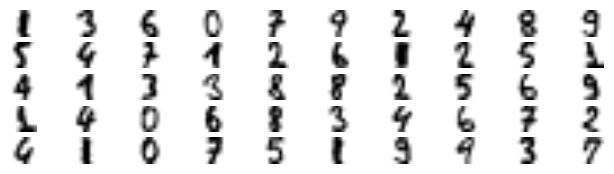

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [30]:
# 위와 같이 대표이미지를 생성하고 대표이미지에 레이블을 선정한다.
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [31]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [32]:
# 모든 샘플에 레이블을 전달한다
# 1400개의 데이터셋이 50개의 클러스터로 분류되어 있는데
# 내가 50개의 클러스터의 대표 숫자를 알고 있으니
# 각 샘플에 클러스터의 대표 숫자를 집어넣음

y_train_propagated = np.empty(len(X_train), dtype = np.int64) #빈 배열
for i in range(k): # k = 50, len(kmeans_labels) = 1400
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8967254408060453

In [45]:
# 센트로이드의 중심으로부터 가장 멀리 떨어진 1%를 제거하면
# 성능이 더욱 향상됨.
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [46]:
# 전파된 레이블은 실제 레이블과 97.6% 유사함
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

# DBSCAN

In [77]:
"""
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

KMean처럼 센트로이드로 클러스터링을 하는게 아닌, 연속된 밀집된 지역을
클러스터로 정의하는 알고리즘이다. ε(엡실론) 거리 내에 있는 샘플들은 같은
클러스터로 분류된다.

dbscan.labels_ : 어떤 클러스터에 분류되었는지 담고있다. -1은 이상치
dbscan.core_sample_indices_ : 핵심 샘플의 인덱스
dbscan.components_ : 핵심 샘플의 좌표

장점:
1. 클러스터의 형태와 크기에 유연: DBSCAN은 원형이 아닌 클러스터도 잘 찾아냄.
2. 이상치 감지: 잡음 포인트를 이상치로 분류하여 강력한 이상치 감지 기능을 제공.
3. 파라미터 수가 적음: 클러스터의 수를 미리 지정할 필요가 없음.

단점:
1. 변수의 밀도 차이가 큰 경우: 다양한 밀도를 가진 데이터에 대해서는 군집화 어려움
2. 고차원 데이터: 차원이 높아질수록, 모든 포인트 간의 거리가  비슷해져서
                  밀도 기반 군집화가 어려워지고 시간 복잡도(O(m^2n))도 늘어남
"""
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

#DBSCAN은 군집까진 만들지만, 새로운 샘플이 어떤 군집에 들어갈지는 predict못한다.
#그래서 다른 군집 예측기 모델과 함께 사용해야 한다.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

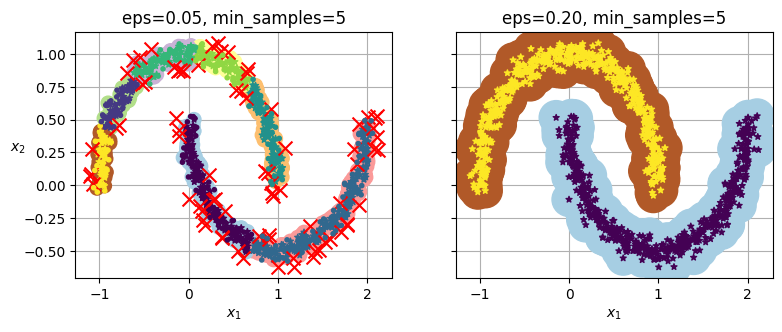

In [78]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

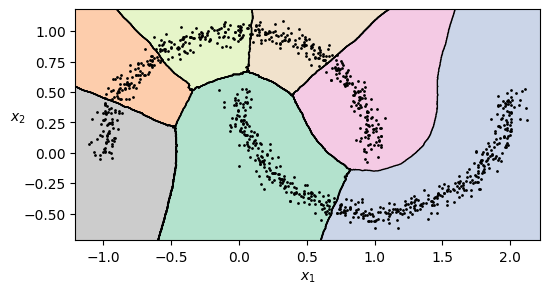

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.show()

# 가우스 혼합(GMM)

In [ ]:
"""
가우스 혼합 알고리즘(Gaussian Mixture Model)
데이터를 여러 개의 정규 분포(Gaussian distributions)의 조합으로
모델링하는 군집화 알고리즘이다.

gm.weights_ : 각 클러스터의 가중치
gm.means_  : 정규 분포의 중심
gm.covariances_ : 분포가 어떻게 퍼져있는지를 나타내는 공분산 행렬
gm.converged_  : 알고리즘이 수렴했는지 True / False
gm.n_iter_ : 몇 번 만에 수렴했는지

gm.predcit(X) : 데이터가 어떤 클러스터에 레이블 되었는지 (하드 군집)
gm.predcit_proba(X) : 데이터가 각 클러스터에 어느정도의 확률로 속해있는지(소프트 군집)

# n개의 새로운 샘플을 만들수도 있다
X_new, y_new = gm.sample(n)

장점:
1. 유연성: GMM은 클러스터의 크기와 모양이 다양해도 잘 작동한다.(특히 타원형)
2. 소프트 클러스터링: 각 데이터 포인트가 여러 클러스터에 속할 확률을 제공하므로.
       이를 통해 데이터 포인트가 여러 클러스터에 걸쳐 있을 수 있음을 나타낸다.

단점:
1. 계산 복잡성: 데이터의 크기가 크거나 차원이 높을 때 성능이 저하될 수 있다.
                이때 covariance_type로 공분산 행렬의 모양에 제약을 가할 수 있는데.
                종류는 'spherical', 'diag', tide', 'full' 등이 있다.
                기본값은 'full'이다. 이때 'spherical'과 'diag'의 계산 복잡도는
                O(kmn)인 반면 'tide'와 'full'은 O(kmn^2 + kn^3)이므로
                특성수가 많아지면 적용하기 어렵다.

2. 최적의 클러스터 수 결정: 클러스터의 수를 미리 정해야 하는데,
                            이를 결정하는 것이 항상 명확하지 않을 수 있다.
"""
#타원형 데이터셋
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type= 'full')
gm.fit(X)

"""
적절한 n_components의 개수를 선정하는 것은
gm.bic(X) 또는 gm.aic(X)의 값이 최소화되는 값을 선택하면 된다.
서로 최소화하는 클러스터의 개수가 다를때는 bic가 더 간단한 모델을 선택하는
경향이 있다. 이는 데이터에 잘 맞지 않을 수 있다는 뜻이다.

필요없는 가중치를 0으로 만드는 베이즈 가우스 혼합 모델도 사용할 수 있다.
n_components를 크게 지정하고 훈련하면 10개중에 3개를 알아서 골라낸다.
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)
array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])
"""

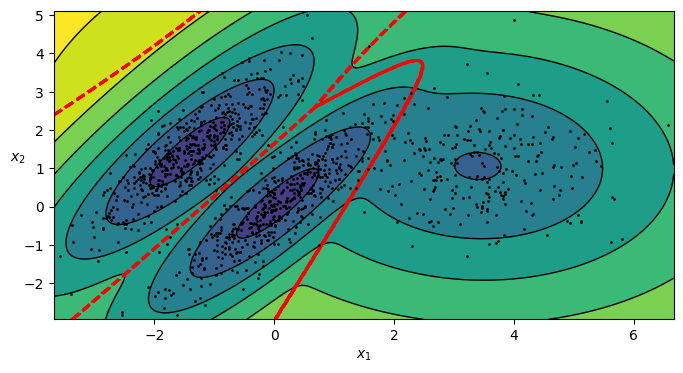

In [63]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

**가우스 혼합 모델의 응용**

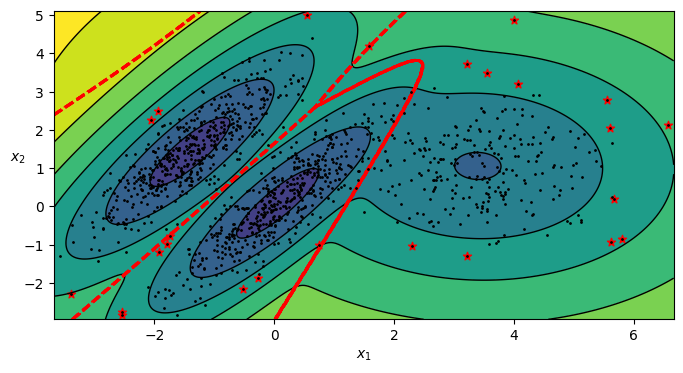

In [72]:
# 1. 이상치 탐지

"""
데이터에 이상치가 많으면 GMM이 제대로 된 훈련을 할 수 없게 된다.
sklearn에서는 이러한 이상치 데이터를 감지해주는 EllipticEnvelope를 제공한다.
다만 이렇게 제거되는 이상치에 중요한 정보가 없는지 확인해야한다.

from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination=0.15)  # 이상치 비율 추정
envelope.fit(X)

# 이상치 탐지
predictions = envelope.predict(X)
# 이상치 제거
X_clean = X[predictions == 1]

# X_clean을 훈련 데이터로 gmm을 훈련한다...
"""

# 밀도가 낮은 지역에 있는 샘플을 이상치로 분류한다.
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()


# 연습 문제

10번

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

olivetti = fetch_olivetti_faces()

"""
StratifiedShuffleSplit은 for문으로 접근하거나 next로 접근해야함
총 샘플 개수 : 400

test_size 0.1는 10%를 의미하고 40은 샘플 40개를 의미한다
즉 아래는 400개의 샘플을 훈련/테스트 (360,40)으로 나누고
다시 훈련 샘플을 (280,80)으로 나눈 것이다.
"""
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1,random_state = 42)
train_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train = olivetti.data[train_idx] # (360, 4096)
y_train = olivetti.target[train_idx]
X_test = olivetti.data[test_idx] # (40, 4096)
y_test =  olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80,random_state = 42)
train_idx, val_idx = next(strat_split.split(X_train, y_train))
X_train = olivetti.data[train_idx] # (280, 4096)
y_train = olivetti.target[train_idx]
X_valid = olivetti.data[val_idx] # (80, 4096)
y_valid =  olivetti.target[val_idx]

In [2]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [10]:
# 작업 속도를 높이기 위해 PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)  # 4096차원 -> 198차원
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

198

21

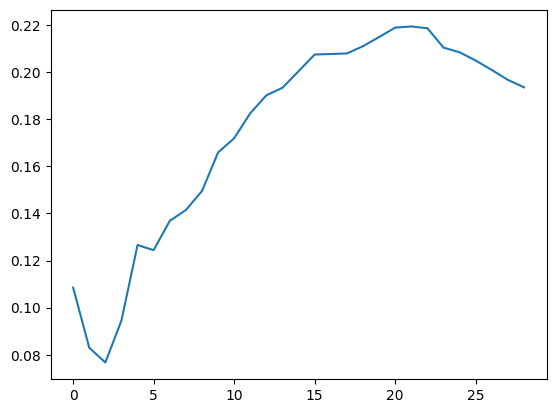

In [11]:
# 실루엣 점수를 확인해서 적절한 클러스터 개수를 찾는다.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette = []
for i in range(5,150,5):
    kmean = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    kmean.fit(X_train_pca)
    silhouette.append(silhouette_score(X_train_pca, kmean.labels_))

plt.plot(silhouette)
plt.show

silhouette.index(max(silhouette))

In [12]:
kmean = KMeans(n_clusters = 21*5, n_init = 'auto', random_state = 42)
kmean.fit(X_train_pca)

KMeans(n_clusters=105, n_init='auto', random_state=42)

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmean.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmean.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

11번

In [15]:
# 차원 축소된 데이터로 랜덤포레스트 분류기 사용해보기
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
RF_clf.fit(X_train_pca, y_train)
RF_clf.score(X_valid_pca, y_valid)

0.875

In [ ]:
# KMean을 차원 축소 도구로 활용하여 분류기를 훈련해보기(준지도 학습)
# n_clusters가 105이므로 4096 -> 198 -> 105 차원

X_train_reduced = kmean.transform(X_train_pca)
X_valid_reduced = kmean.transform(X_valid_pca)
X_test_reduced = kmean.transform(X_test_pca)

RF_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
RF_clf.fit(X_train_reduced, y_train)
RF_clf.score(X_valid_reduced, y_valid)
# 0.875 -> 0.6375로 성능이 나빠짐

In [25]:
# 축소된 세트에서 추출한 특성을 원본에 추가하면?
import numpy as np

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

RF_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
RF_clf.fit(X_train_extended, y_train)
RF_clf.score(X_valid_extended, y_valid)
# 0.6375 -> 0.75 로 조금 향상됨 그러나 Kmean을 사용하지 않고 pca만 활용해 훈련한
# 처음 점수보다 나쁨.

0.75

12번

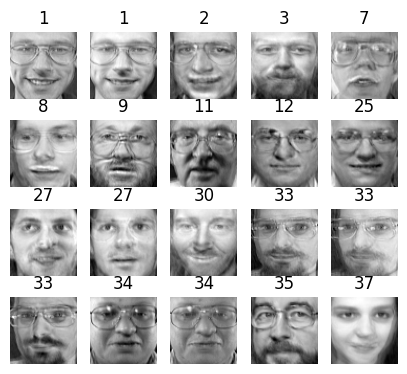

In [27]:
#가우시안 모델을 훈련해보고, 새로운 모델을 만들어본다.

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 40, random_state = 42)
y_pred = gm.fit_predict(X_train_pca)

gen_faces_reduced, y_gen_faces = gm.sample(20) # 20개 생성
gen_faces = pca.inverse_transform(gen_faces_reduced)

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

plot_faces(gen_faces, y_gen_faces)

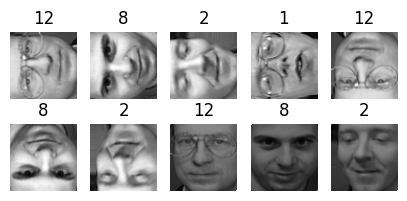

In [28]:
# 이미지를 돌리거나 회전하거나 어둡게 해본다.

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [29]:
X_bad_faces_pca = pca.transform(X_bad_faces)

# 이 잘못된 사진은 원래 사진에 비해서 score가 매우 낮은걸 볼 수 있다.
"""
잘못된 데이터 score : -1,000,000 ~ -3,000,000
[-3.55764821e+07 -2.55207561e+07 -3.72392983e+07 -2.93064375e+07
 -3.22235130e+07 -3.15559784e+07 -3.30244818e+07 -1.16529610e+08
 -1.19045774e+08 -1.24471088e+08]

정상 데이터 score : 1000 ~ 1150
 [1096.72228813 1091.43934141 1148.0269431  1126.54607659 1111.9849537
 1126.54607639 1150.49286412 1158.40164913 1015.98808947 1087.16190691]
"""
print(gm.score_samples(X_bad_faces_pca))
print(gm.score_samples(X_train_pca[:10]))

[-3.55764821e+07 -2.55207561e+07 -3.72392983e+07 -2.93064375e+07
 -3.22235130e+07 -3.15559784e+07 -3.30244818e+07 -1.16529610e+08
 -1.19045774e+08 -1.24471088e+08]
[1096.72228813 1091.43934141 1148.0269431  1126.54607659 1111.9849537
 1126.54607639 1150.49286412 1158.40164913 1015.98808947 1087.16190691]


13번

In [32]:
# 재구성 오차를 확인해도 이상한 데이터들을 확인해볼 수 있다.
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

print(reconstruction_errors(pca, X_train).mean())
#0.00018523146 # 손실이 크게 없음
print(reconstruction_errors(pca, X_bad_faces).mean())
#0.0054183668 # 손실이 꽤 큼

0.00018523146
0.0054183668
